In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("../datasets/lab1.csv")
df.head(100)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
95,0,1,Mr. George B Goldschmidt,male,71.0,0,0,34.6542
96,1,1,Mr. William Bertram Greenfield,male,23.0,0,1,63.3583
97,1,2,Mrs. John T (Ada Julia Bone) Doling,female,34.0,0,1,23.0000
98,0,2,Mr. Sinai Kantor,male,34.0,1,0,26.0000


In [22]:
total_rows = len(df)
print(f"Всего строк: {total_rows}")
total_missing = df.isnull().sum().sum() + (df == '').sum().sum()
print(f"Всего пропущенных значений: {total_missing}")
print("Типы данных строк:")
df.dtypes

Всего строк: 887
Всего пропущенных значений: 0
Типы данных строк:


Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [29]:
df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887,887,887.000000,887.000000,887.000000,887.00000
unique,NaN,NaN,887,2,NaN,NaN,NaN,NaN
top,NaN,NaN,Mr. Patrick Dooley,male,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,573,NaN,NaN,NaN,NaN
mean,0.385569,2.305524,NaN,NaN,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,NaN,NaN,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,NaN,NaN,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,31.13750



Корреляционная матрица:
                         Survived  Pclass    Age  Siblings/Spouses Aboard  \
Survived                    1.000  -0.337 -0.060                   -0.037   
Pclass                     -0.337   1.000 -0.391                    0.085   
Age                        -0.060  -0.391  1.000                   -0.298   
Siblings/Spouses Aboard    -0.037   0.085 -0.298                    1.000   
Parents/Children Aboard     0.080   0.020 -0.194                    0.414   
Fare                        0.256  -0.549  0.112                    0.159   

                         Parents/Children Aboard   Fare  
Survived                                   0.080  0.256  
Pclass                                     0.020 -0.549  
Age                                       -0.194  0.112  
Siblings/Spouses Aboard                    0.414  0.159  
Parents/Children Aboard                    1.000  0.215  
Fare                                       0.215  1.000  


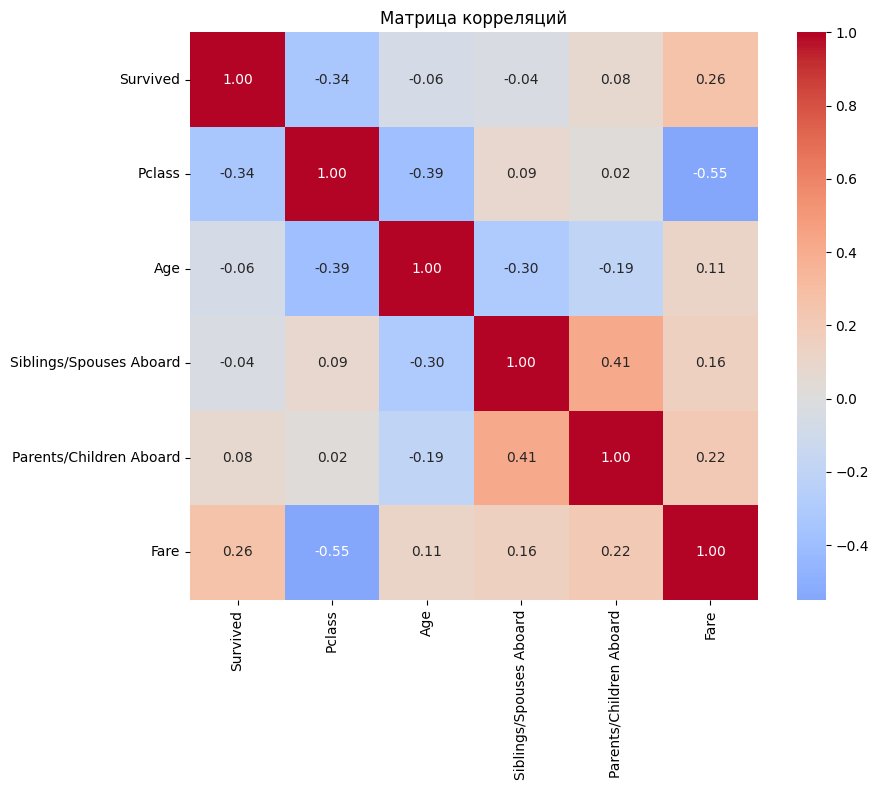

In [31]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
print("\nКорреляционная матрица:")
correlation_matrix = df[numeric_columns].corr()
print(correlation_matrix.round(3))
        
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                   square=True, fmt='.2f')
plt.title('Матрица корреляций')
plt.tight_layout()
plt.show()

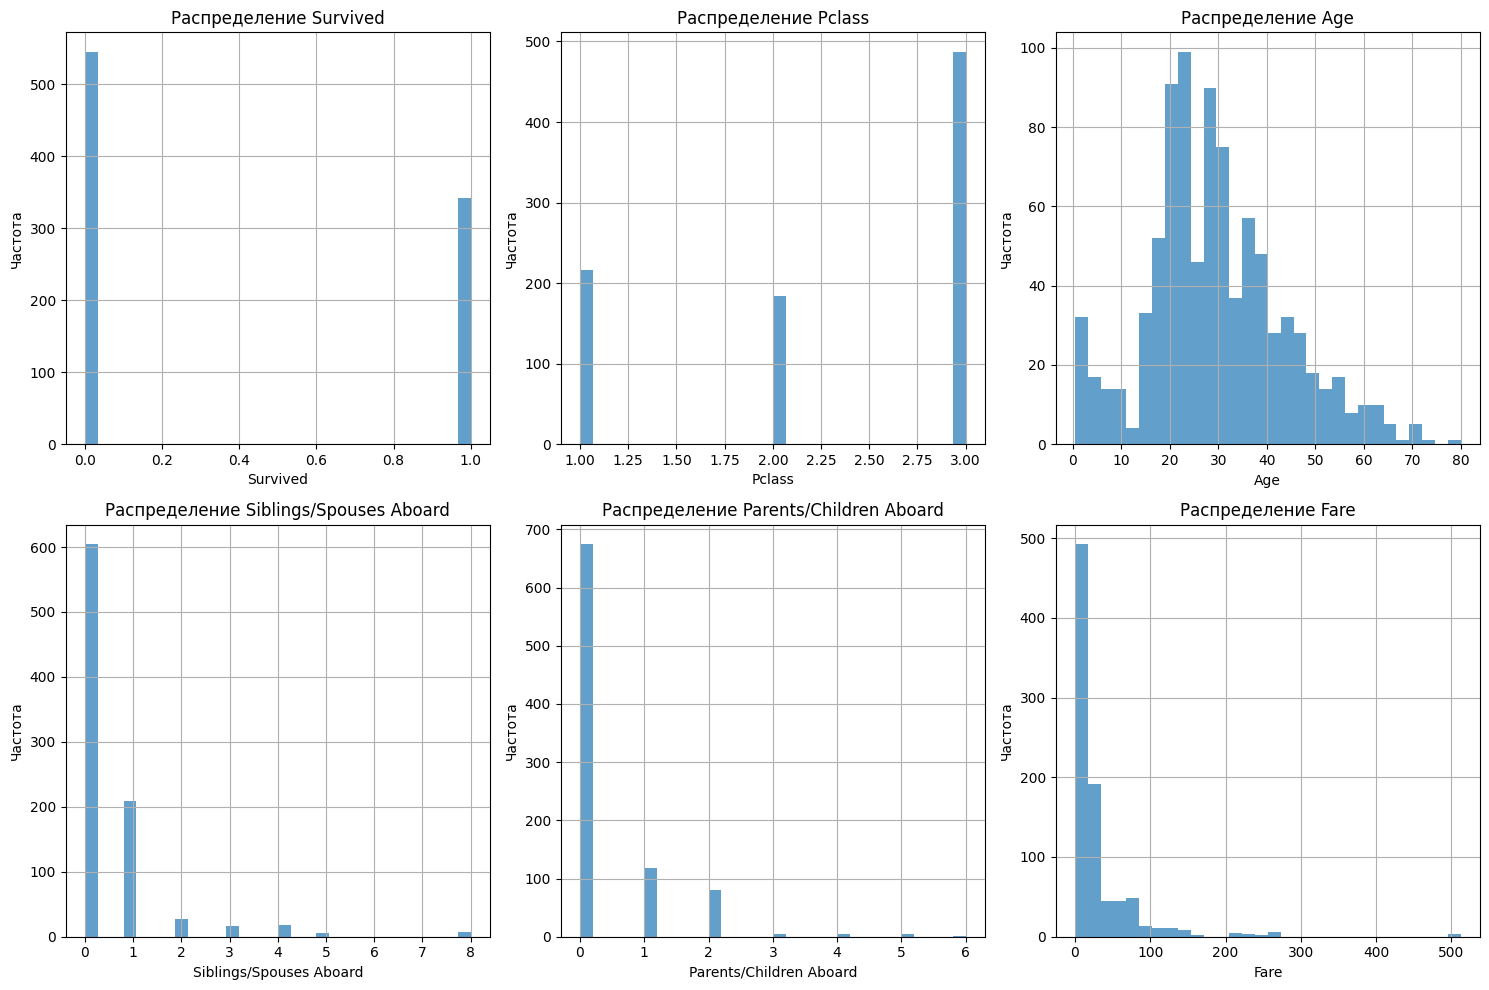

In [33]:
n_cols = min(3, len(numeric_columns))
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols
        
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols > 1 else [axes]
        
for i, col in enumerate(numeric_columns):
      if i < len(axes):
          df[col].hist(bins=30, ax=axes[i], alpha=0.7)
          axes[i].set_title(f'Распределение {col}')
          axes[i].set_xlabel(col)
          axes[i].set_ylabel('Частота')
        
        # Скрываем пустые subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)
        
plt.tight_layout()
plt.show()

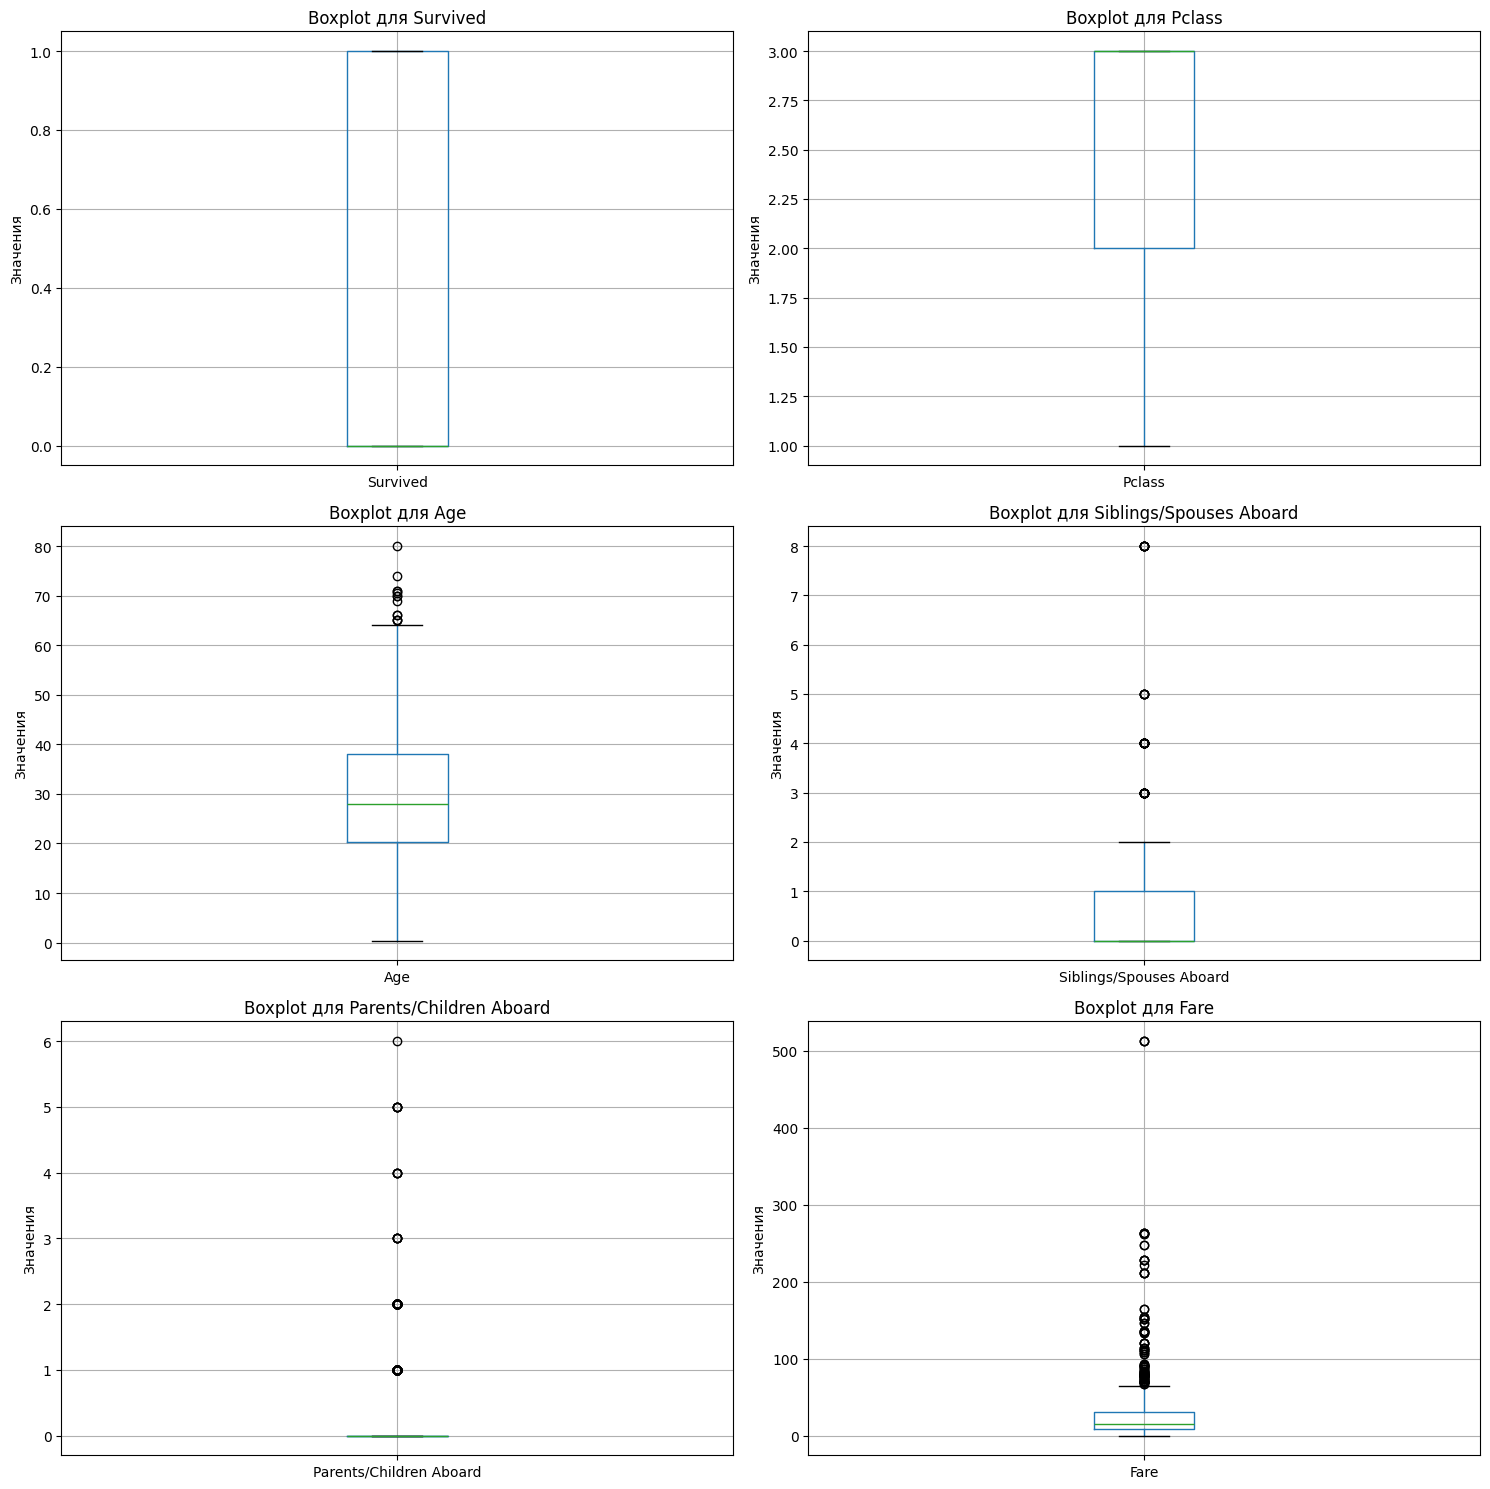

In [34]:
n_cols = min(2, len(numeric_columns))
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols
        
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols > 1 else [axes]
        
for i, col in enumerate(numeric_columns):
    if i < len(axes):
        df.boxplot(column=col, ax=axes[i])
        axes[i].set_title(f'Boxplot для {col}')
        axes[i].set_ylabel('Значения')
        
        # Скрываем пустые subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)
        
plt.tight_layout()
plt.show()


--- Метод: cap ---
=== МЕТОДЫ ОБРАБОТКИ ВЫБРОСОВ ===
Survived: выбросы ограничены границами [-1.50, 2.50]
Pclass: выбросы ограничены границами [0.50, 4.50]
Age: выбросы ограничены границами [-6.38, 64.62]
Siblings/Spouses Aboard: выбросы ограничены границами [-1.50, 2.50]
Parents/Children Aboard: выбросы ограничены границами [0.00, 0.00]
Fare: выбросы ограничены границами [-26.89, 65.96]


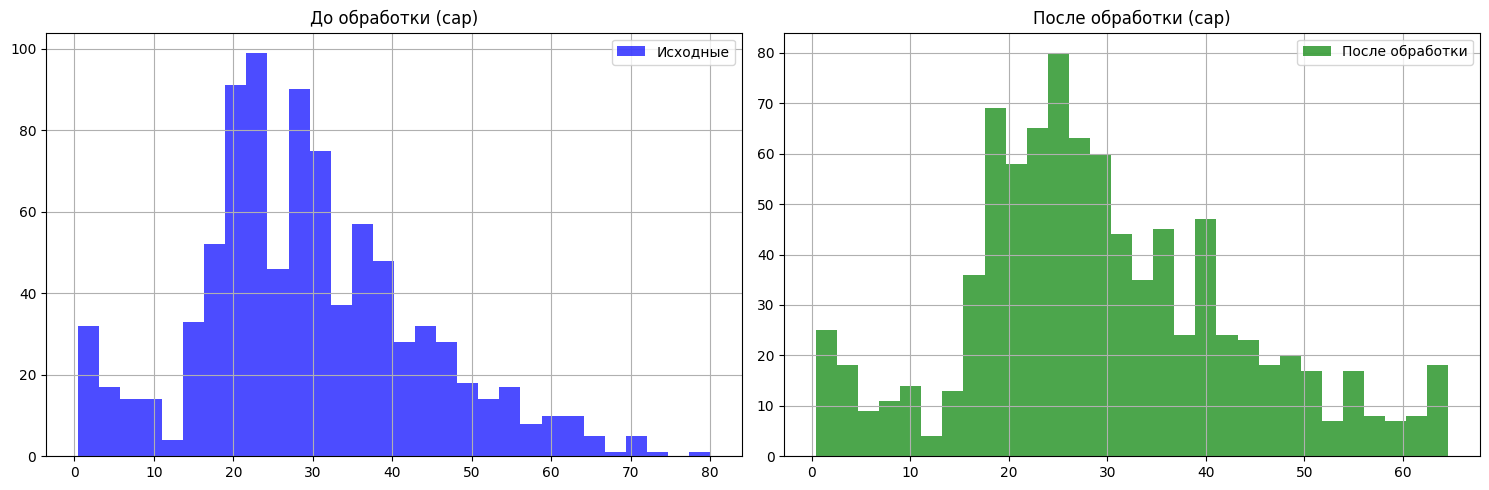


--- Метод: winsorize ---
=== МЕТОДЫ ОБРАБОТКИ ВЫБРОСОВ ===
Survived: применена винзоризация (5% с каждой стороны)
Pclass: применена винзоризация (5% с каждой стороны)
Age: применена винзоризация (5% с каждой стороны)
Siblings/Spouses Aboard: применена винзоризация (5% с каждой стороны)
Parents/Children Aboard: применена винзоризация (5% с каждой стороны)
Fare: применена винзоризация (5% с каждой стороны)


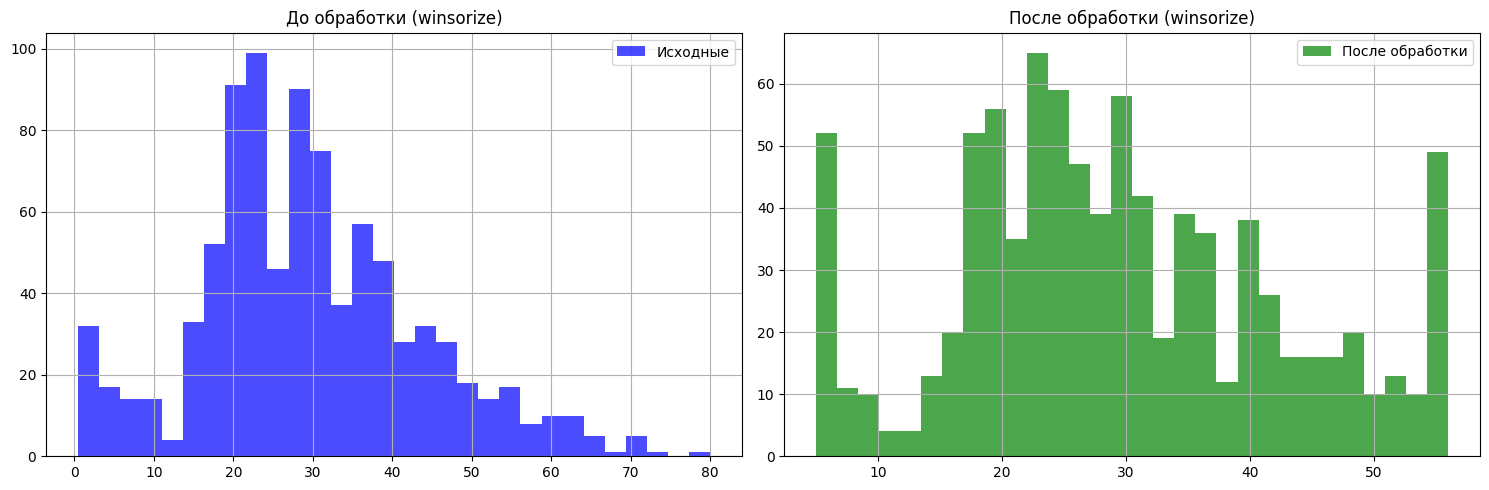


--- Метод: transform ---
=== МЕТОДЫ ОБРАБОТКИ ВЫБРОСОВ ===
Survived: логарифмическое преобразование невозможно (есть отрицательные значения)
Pclass: применено логарифмическое преобразование
Age: применено логарифмическое преобразование
Siblings/Spouses Aboard: логарифмическое преобразование невозможно (есть отрицательные значения)
Parents/Children Aboard: логарифмическое преобразование невозможно (есть отрицательные значения)
Fare: логарифмическое преобразование невозможно (есть отрицательные значения)


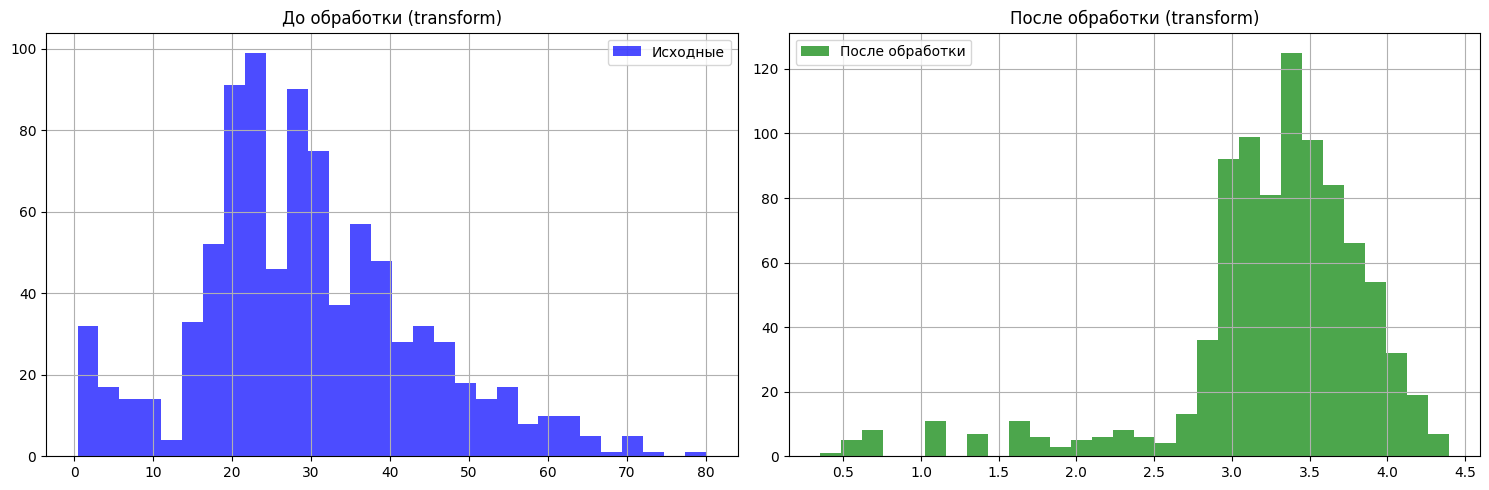

In [38]:
def handle_outliers(df, method='winsorize'):
    df_processed = df.copy()
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    
    print("=== МЕТОДЫ ОБРАБОТКИ ВЫБРОСОВ ===")
    
    for col in numeric_columns:
        original_data = df[col].copy()
        
        if method == 'remove':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            mask = (df[col] >= lower_bound) & (df[col] <= upper_bound)
            df_processed = df_processed[mask]
            print(f"{col}: удалено {len(original_data) - len(df_processed)} выбросов")
        
        elif method == 'cap':
            # Ограничение выбросов (capping)
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            df_processed[col] = np.where(df_processed[col] < lower_bound, lower_bound, df_processed[col])
            df_processed[col] = np.where(df_processed[col] > upper_bound, upper_bound, df_processed[col])
            print(f"{col}: выбросы ограничены границами [{lower_bound:.2f}, {upper_bound:.2f}]")
        
        elif method == 'winsorize':
            # Винзоризация (замена на перцентили)
            from scipy.stats.mstats import winsorize
            df_processed[col] = winsorize(df_processed[col], limits=[0.05, 0.05])
            print(f"{col}: применена винзоризация (5% с каждой стороны)")
        
        elif method == 'transform':
            # Логарифмическая трансформация
            if (df_processed[col] > 0).all():
                df_processed[col] = np.log1p(df_processed[col])
                print(f"{col}: применено логарифмическое преобразование")
            else:
                print(f"{col}: логарифмическое преобразование невозможно (есть отрицательные значения)")
    
    return df_processed

# Пример обработки разными методами
methods = ['cap', 'winsorize', 'transform']

for method in methods:
    print(f"\n--- Метод: {method} ---")
    df_processed = handle_outliers(df, method=method)
    
    # Сравниваем распределения до и после
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # До обработки
    df['Age'].hist(bins=30, alpha=0.7, ax=ax1, color='blue', label='Исходные')
    ax1.set_title(f'До обработки ({method})')
    ax1.legend()
    
    # После обработки
    df_processed['Age'].hist(bins=30, alpha=0.7, ax=ax2, color='green', label='После обработки')
    ax2.set_title(f'После обработки ({method})')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()